In [6]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy import nan as NaN

# 2.4 移除重复数据(提前预习)
'''
DataFrame中经常会出现重复行，利用duplicated()函数返回每一行判断是否重复的结果（重复则为True)
'''
df1=pd.DataFrame({'A':[1,1,1,2,2,3,1],'B':list("aabbbca")})
print(df1)

# 判断每一行是否重复(结果是bool值，TRUE代表重复的)
# print(df1.duplicated())

# 去除全部的重复行
# print(df1.drop_duplicates())

# # 指定列去除重复行
# print(df1.drop_duplicates(['A']))

# 保留重复行中的最后一行
# print(df1.drop_duplicates(['A'],keep='last'))

# 去除重复的同时改变DataFrame对象
# df1.drop_duplicates(['A','B'],inplace=True)
# print(df1)

A  B
0  1  a
1  1  a
2  1  b
3  2  b
4  2  b
5  3  c
6  1  a
   A  B
0  1  a
2  1  b
3  2  b
5  3  c


In [10]:
import pandas as pd
import numpy as np

# date = pd.date_range(start='20190501',end='20190530')
# print(date)

# freq：日期偏移量，取值为string, 默认为'D'，  freq='1h30min'  freq='10D'
# periods：固定时期，取值为整数或None
date = pd.date_range(start='20190501',periods=9,freq='10D')
print(date)

DatetimeIndex(['2019-05-01', '2019-05-11', '2019-05-21', '2019-05-31',
               '2019-06-10', '2019-06-20', '2019-06-30', '2019-07-10',
               '2019-07-20'],
              dtype='datetime64[ns]', freq='10D')


In [29]:
# 可以将时间作为索引
# index = pd.date_range(start='20190101',periods=10)
# df = pd.Series(np.random.randint(0,10,size = 10),index=index)
# print(df)

# truncate这个函数将before指定日期之前的值全部过滤出去,after指定日期之前的值全部过滤出去.
# after = df.truncate(before='2019-01-8')
# print(after)

long_ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2019',periods=1000))
print(long_ts)
# 根据年份获取
result = long_ts['2020']
print(result)

# 使用切片
result = long_ts['2020-05-01':'2020-05-06']
print(result)

# 通过between_time()返回位于指定时间段的数据集
index=pd.date_range("2018-03-17","2018-03-30",freq="2H")
print(index)
ts = pd.Series(np.random.randn(157),index=index)
print(ts.between_time("7:00","17:00"))

index=pd.date_range('1/1/2019',periods=100)
df = pd.DataFrame(np.random.randn(100,4),index=index)
print(df)
print(df.loc['2019-04'])

2019-01-01    1.505571
2019-01-02    1.244858
2019-01-03    0.722854
2019-01-04    0.335378
2019-01-05    0.418097
                ...   
2021-09-22    0.671539
2021-09-23   -0.431119
2021-09-24   -1.373896
2021-09-25   -0.753824
2021-09-26    0.472108
Freq: D, Length: 1000, dtype: float64
2020-01-01    0.672923
2020-01-02    0.060664
2020-01-03   -0.640461
2020-01-04    0.584159
2020-01-05   -0.145267
                ...   
2020-12-27    0.276416
2020-12-28    0.200271
2020-12-29    0.577008
2020-12-30    0.783797
2020-12-31    1.746344
Freq: D, Length: 366, dtype: float64
2020-05-01    0.683537
2020-05-02   -0.878146
2020-05-03    0.924046
2020-05-04    0.855280
2020-05-05    0.015640
2020-05-06    0.691936
Freq: D, dtype: float64
DatetimeIndex(['2018-03-17 00:00:00', '2018-03-17 02:00:00',
               '2018-03-17 04:00:00', '2018-03-17 06:00:00',
               '2018-03-17 08:00:00', '2018-03-17 10:00:00',
               '2018-03-17 12:00:00', '2018-03-17 14:00:00',
             

In [39]:
## 6. 移位日期
ts = pd.Series(np.random.randn(10),index=pd.date_range('1/1/2019',periods=10))
# print(ts)

# 移动数据，索引不变，默认由NaN填充
# periods: 移动的位数 负数是向上移动
# fill_value: 移动后填充数据
# freq： 日期偏移量 
ts = ts.shift(periods=-2,freq='D')
print(ts)
# # 通过tshift()将索引移动指定的时间：
ts = ts.tshift(-2)
print(ts)

2018-12-30    0.050541
2018-12-31   -0.335799
2019-01-01   -0.591523
2019-01-02   -0.169902
2019-01-03    0.571288
2019-01-04   -1.431147
2019-01-05   -1.035527
2019-01-06   -0.969785
2019-01-07   -1.268609
2019-01-08   -0.576720
Freq: D, dtype: float64
2018-12-28    0.050541
2018-12-29   -0.335799
2018-12-30   -0.591523
2018-12-31   -0.169902
2019-01-01    0.571288
2019-01-02   -1.431147
2019-01-03   -1.035527
2019-01-04   -0.969785
2019-01-05   -1.268609
2019-01-06   -0.576720
Freq: D, dtype: float64


In [44]:
import pytz
print(pytz.common_timezones)

# 处理一列
df = pd.DataFrame([1554970740000, 1554970800000, 1554970860000],columns = ['time_stamp'])
print(df)
#先赋予标准时区再转东八区
pd.to_datetime(df['time_stamp'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')

# 处理中文
pd.to_datetime('2019年10月10日',format='%Y年%m月%d日')

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

Timestamp('2019-10-10 00:00:00')

In [70]:
import pandas as pd
import numpy as np
df=pd.DataFrame({
    'name':['BOSS','Lilei','Lilei','Han','BOSS','BOSS','Han','BOSS'],
    'Year':[2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary':[999999,20000,25000,3000,9999999,999999,3500,999999],
    'Bonus':[100000,20000,20000,5000,200000,300000,3000,400000]
    })

print(df)

# 根据name这一列进行分组
group_by_name=df.groupby('name')
print(group_by_name)

# 查看分组
print(group_by_name.groups)
# 分组后的数量
print(group_by_name.count())

# # 查看分组的情况
for name,group in group_by_name:
    print(name)# 组的名字
    print(group)# 组具体内容

# 可以选择分组
print(group_by_name.get_group('BOSS'))
    
# # 按照某一列进行分组, 将name这一列作为分组的键，对year进行分组
group_by_name=df['Year'].groupby(df['name'])
print(group_by_name.count())

# 按照多列进行分组
group_by_name_year=df.groupby(['name','Year'])

for name,group in group_by_name_year:
    print(name)# 组的名字
    print(group)# 组具体内容

print(group_by_name_year.get_group(('BOSS',2016)))

name  Year   Salary   Bonus
0   BOSS  2016   999999  100000
1  Lilei  2016    20000   20000
2  Lilei  2016    25000   20000
3    Han  2016     3000    5000
4   BOSS  2017  9999999  200000
5   BOSS  2017   999999  300000
6    Han  2017     3500    3000
7   BOSS  2017   999999  400000
{'BOSS': Int64Index([0, 4, 5, 7], dtype='int64'), 'Han': Int64Index([3, 6], dtype='int64'), 'Lilei': Int64Index([1, 2], dtype='int64')}
       Year  Salary  Bonus
name                      
BOSS      4       4      4
Han       2       2      2
Lilei     2       2      2
BOSS
   name  Year   Salary   Bonus
0  BOSS  2016   999999  100000
4  BOSS  2017  9999999  200000
5  BOSS  2017   999999  300000
7  BOSS  2017   999999  400000
Han
  name  Year  Salary  Bonus
3  Han  2016    3000   5000
6  Han  2017    3500   3000
Lilei
    name  Year  Salary  Bonus
1  Lilei  2016   20000  20000
2  Lilei  2016   25000  20000
   name  Year   Salary   Bonus
0  BOSS  2016   999999  100000
4  BOSS  2017  9999999  200000
5  BOSS 

In [81]:
# 将某列数据按数据值分成不同范围段进行分组（groupby）运算
df = pd.DataFrame({'Age': np.random.randint(20, 70, 100), 
                    'Sex': np.random.choice(['M', 'F'], 100), 
                    })
print(df)
#用cut函数对于年龄进行分段分组，用bins来对年龄进行分段，左开右闭
age_groups = pd.cut(df['Age'], bins=[19,40,65,100])
print(age_groups)
print(df.groupby(age_groups).count())

# # 按‘Age’分组范围和性别（sex）进行制作交叉表
display(pd.crosstab(age_groups, df['Sex']))

Age Sex
0    68   F
1    60   F
2    64   F
3    38   F
4    52   F
..  ...  ..
95   66   F
96   69   M
97   55   F
98   29   F
99   55   M

[100 rows x 2 columns]
0     (65, 100]
1      (40, 65]
2      (40, 65]
3      (19, 40]
4      (40, 65]
        ...    
95    (65, 100]
96    (65, 100]
97     (40, 65]
98     (19, 40]
99     (40, 65]
Name: Age, Length: 100, dtype: category
Categories (3, interval[int64]): [(19, 40] < (40, 65] < (65, 100]]
           Age  Sex
Age                
(19, 40]    37   37
(40, 65]    54   54
(65, 100]    9    9


Sex,F,M
Age,,
"(19, 40]",20,17
"(40, 65]",28,26
"(65, 100]",6,3


In [89]:
df1=pd.DataFrame({'Data1':np.random.randint(0,10,5),
                  'Data2':np.random.randint(10,20,5),
                  'key1':list('aabba'),
                  'key2':list('xyyxy')})
print(df1)

# 按key1分组，进行聚合计算
# 注意：当分组后进行数值计算时，不是数值类的列（即麻烦列）会被清除
print(df1.groupby('key1').sum())
# 只算data1
print(df1['Data1'].groupby(df1['key1']).sum())
print(df1.groupby('key1')['Data1'].sum())
print(df1.groupby('key1').agg('sum'))
display(df1.groupby('key1').agg(['sum','mean','std']))

Data1  Data2 key1 key2
0      8     10    a    x
1      0     19    a    y
2      1     17    b    y
3      3     13    b    x
4      1     17    a    y
      Data1  Data2
key1              
a         9     46
b         4     30
key1
a    9
b    4
Name: Data1, dtype: int64
key1
a    9
b    4
Name: Data1, dtype: int64
      Data1  Data2
key1              
a         9     46
b         4     30


Data1                Data2                     
       sum mean       std   sum       mean       std
key1                                                
a        9    3  4.358899    46  15.333333  4.725816
b        4    2  1.414214    30  15.000000  2.828427

In [92]:
# 可自定义函数，传入agg方法中 grouped.agg(func)
def peak_range(df):
    """
        返回数值范围
    """
    return df.max() - df.min()

print(df1.groupby('key1').agg(peak_range))

 #同时应用多个聚合函数
print(df1.groupby('key1').agg(['mean', 'std', 'count', peak_range])) # 默认列名为函数名
print(df1.groupby('key1').agg(['mean', 'std', 'count', ('range', peak_range)])) # 通过元组提供新的列名

Data1  Data2
key1              
a         8      9
b         2      4
     Data1                                 Data2                           
      mean       std count peak_range       mean       std count peak_range
key1                                                                       
a        3  4.358899     3          8  15.333333  4.725816     3          9
b        2  1.414214     2          2  15.000000  2.828427     2          4
     Data1                            Data2                      
      mean       std count range       mean       std count range
key1                                                             
a        3  4.358899     3     8  15.333333  4.725816     3     9
b        2  1.414214     2     2  15.000000  2.828427     2     4


In [93]:
# 给每列作用不同的聚合函数
dict_mapping = {
    'Data1':['mean','max'],
    'Data2':'sum'
}
df1.groupby('key1').agg(dict_mapping)

Data1     Data2
      mean max   sum
key1                
a        3   8    46
b        2   3    30

In [94]:
# 拓展apply函数
# apply函数是pandas里面所有函数中自由度最高的函数
df1=pd.DataFrame({'sex':list('FFMFMMF'),'smoker':list('YNYYNYY'),'age':[21,30,17,37,40,18,26],'weight':[120,100,132,140,94,89,123]})
print(df1)
def bin_age(age):
    if age >=18:
        return 1
    else:
        return 0

# 抽烟的年龄大于等18的
print(df1['age'].apply(bin_age))
df1['age'] = df1['age'].apply(bin_age)
print(df1)

sex smoker  age  weight
0   F      Y   21     120
1   F      N   30     100
2   M      Y   17     132
3   F      Y   37     140
4   M      N   40      94
5   M      Y   18      89
6   F      Y   26     123
0    1
1    1
2    0
3    1
4    1
5    1
6    1
Name: age, dtype: int64
  sex smoker  age  weight
0   F      Y    1     120
1   F      N    1     100
2   M      Y    0     132
3   F      Y    1     140
4   M      N    1      94
5   M      Y    1      89
6   F      Y    1     123


In [95]:
# 取出抽烟和不抽烟的体重前二
def top(smoker,col,n=5):
    
    return smoker.sort_values(by=col)[-n:]

df1.groupby('smoker').apply(top,col='weight',n=2)

sex smoker  age  weight
smoker                          
N      4   M      N    1      94
       1   F      N    1     100
Y      2   M      Y    0     132
       3   F      Y    1     140

[1927.0, 1929.0, 1933.0, 1935.0, 1936.0, 1937.0, 1939.0, 1940.0, 1946.0, 1947.0, 1948.0, 1950.0, 1952.0, 1953.0, 1954.0, 1957.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]
[  1   1   1   1   1   1   2   1   2   1   1   1   1   2   2   1   1   1
   1   2   3   5   5   1   1   2   3   4   3   2   5   7   3   2   7   9
   6  14  17  16  13  23  15  25  30  30  33  27  30  33  44  51  66  93
 101 115 157 159 179 190 145 181 182 189 152 182 182 168 168 158 163 145
 128  59]


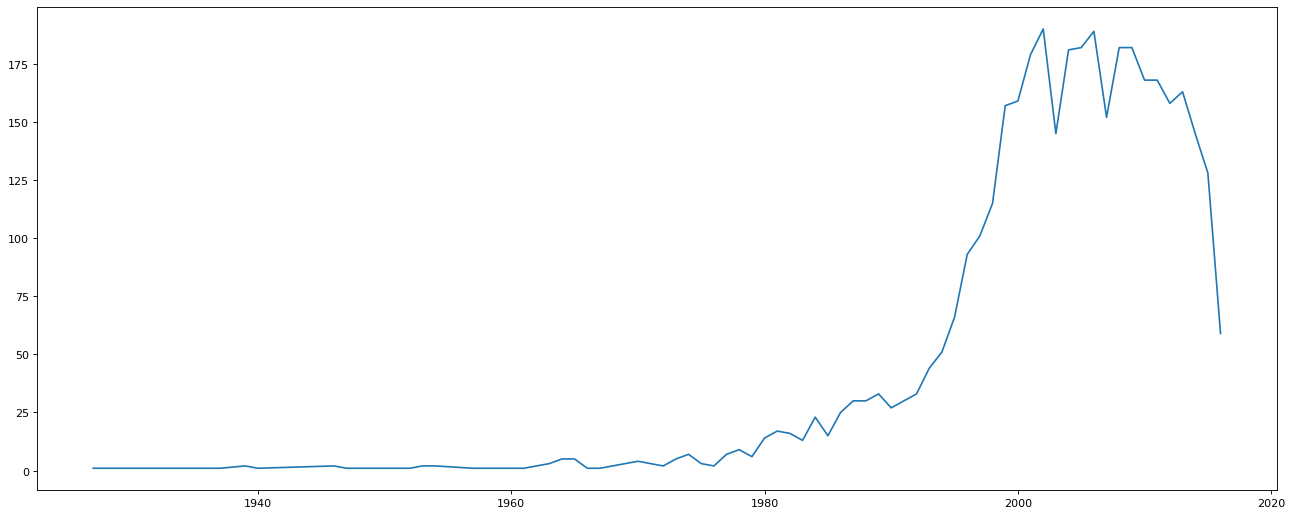

In [105]:
# 读取数据
data = pd.read_csv('movie_metadata.csv')
# print('数据的形状：', data.shape)
# print(data.head())

# 2、处理缺失值
data = data.dropna(how='any')
# print(data.head())

# # 查看票房收入统计
# # 导演vs票房总收入
group_director = data.groupby(by='director_name')['gross'].sum()

# # ascending升降序排列，True升序
result = group_director.sort_values()
# print(type(result))
# print(result)

# # 电影产量年份趋势
from matplotlib import pyplot as plt
import random
from matplotlib import font_manager

movie_years = data.groupby('title_year')['movie_title']

print(movie_years.count().index.tolist())


print(movie_years.count().values)

x = movie_years.count().index.tolist()

y = movie_years.count().values

plt.figure(figsize=(20,8),dpi=80)

plt.plot(x,y)

plt.show()

In [106]:
# 1. 使用to_excel创建Excel文件
import pandas as pd

df = pd.DataFrame({'id':[1,2,3],'name':['zs','ls','ww']})

# 默认会有索引，将ID列设置成索引,会返回一个新的df,如果想要在原来的df上修改需要添加参数inplace=True
df = df.set_index('id')

df.to_excel('./output.xlsx')
print('end')

end


In [112]:
# 2. 使用pandas读取文件
import pandas as pd
# 此处需要安装依赖库xlrd
people = pd.read_excel('./data/People.xlsx')
print('获取文件中的行和列：',people.shape)
print('获取文件中的列名：',people.columns)
# 默认取前五行
print('获取文件中的前几行数据信息：',people.head())
print('获取文件中的后几行数据信息：',people.tail())

获取文件中的行和列： (19972, 6)
获取文件中的列名： Index(['ID', 'Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')
获取文件中的前几行数据信息：    ID      Type Title FirstName MiddleName    LastName
0   1  Employee   NaN       Ken          J     Sánchez
1   2  Employee   NaN     Terri        Lee       Duffy
2   3  Employee   NaN   Roberto        NaN  Tamburello
3   4  Employee   NaN       Rob        NaN     Walters
4   5  Employee   Ms.      Gail          A    Erickson
获取文件中的后几行数据信息：           ID                 Type Title FirstName MiddleName    LastName
19967  20773  Individual Customer   NaN   Crystal        NaN         Guo
19968  20774  Individual Customer   NaN  Isabella          F  Richardson
19969  20775  Individual Customer   NaN   Crystal          S          He
19970  20776  Individual Customer   NaN   Crystal        NaN       Zheng
19971  20777  Individual Customer   NaN   Crystal        NaN          Hu


In [114]:
# 注意常见问题：
# 1. 读取的时候，默认会将第一行作为列名，我们可以修改
people = pd.read_excel('./data/People1.xlsx',header = 1)
print(people.columns)

# 2. 如果第一行或者其他行不满足我们的需求时，我们可以自定义
# 第一种： 设置header为None，会使用默认的1234
people = pd.read_excel('./data/People.xlsx',header = None)
print(people.columns)
print(people.head())

# 第二种： 认为的设置默认值
people.columns = ['ID1','Type1','Title1','FirstName1','MiddleName1','LastName1']
print(people.columns)
print(people.head())

Index(['ID', 'Type', 'Title', 'FirstName', 'MiddleName', 'LastName'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')
    0         1      2          3           4           5
0  ID      Type  Title  FirstName  MiddleName    LastName
1   1  Employee    NaN        Ken           J     Sánchez
2   2  Employee    NaN      Terri         Lee       Duffy
3   3  Employee    NaN    Roberto         NaN  Tamburello
4   4  Employee    NaN        Rob         NaN     Walters
Index(['ID1', 'Type1', 'Title1', 'FirstName1', 'MiddleName1', 'LastName1'], dtype='object')
  ID1     Type1 Title1 FirstName1 MiddleName1   LastName1
0  ID      Type  Title  FirstName  MiddleName    LastName
1   1  Employee    NaN        Ken           J     Sánchez
2   2  Employee    NaN      Terri         Lee       Duffy
3   3  Employee    NaN    Roberto         NaN  Tamburello
4   4  Employee    NaN        Rob         NaN     Walters


In [116]:
# 指定读哪个表
sheet = pd.read_excel('./data/sheet.xlsx',sheet_name='sheet2')
print(sheet.head())

ID  age
0   0   18
1   1   19


In [117]:
# 3. 如果数据在表格中没有顶格写时
# skiprows : 跳过几行
# usecols: 使用那几列（C,指的就是Excel上的ABCD....）
book = pd.read_excel('./data/Books.xlsx',skiprows=3,usecols ="C:F")
print(book.head())

ID      Name  InStore
0 NaN  Book_001      NaN
1 NaN  Book_002      NaN
2 NaN  Book_003      NaN
3 NaN  Book_004      NaN
4 NaN  Book_005      NaN


In [118]:
import pandas as pd
book = pd.read_excel('./data/Books.xlsx',skiprows=3,usecols ="C:F")
print(book['ID'])
# 修改ID 的值
book["ID"].at[0] = 1
print(book['ID'])
'''
at和iat函数是只能选择某个位置的值，iat是按照行索引和列索引的位置来选取数据的。而at是按照行索引和列索引来选取数据；
loc和iloc函数的功能包含at和iat函数的功能
'''

# 使用for循环给ID列添加内容
for i in book.index:
    book["ID"].at[i] = i+1
    
    
    # # 给inStore添加交替值
book["InStore"] = book["InStore"].astype(str)
for i in book.index:
    book["InStore"].at[i] = 'Yes' if i%2==0 else "No"
    
book.set_index('ID',inplace=True)
book.to_excel('./books1.xlsx')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: ID, dtype: float64
0     1.0
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
Name: ID, dtype: float64


In [ ]:
import pandas as pd
import pymysql

conn =pymysql.connect(host='localhost',user='root',passwd='123',db='tieba',port=3306,charset='utf8mb4')

query = 'SELECT id,info,url FROM tieba_info'

df = pd.read_sql_query(query,conn)
print(df)